**Descrição:**  
Os bancos obtêm uma parte significativa de sua receita através da concessão de empréstimos. No entanto, isso frequentemente está associado a riscos. Os mutuários podem não cumprir com o pagamento do empréstimo. Para mitigar esse problema, os bancos decidiram usar Machine Learning para superá-lo. Eles coletaram dados históricos sobre os mutuários e gostariam que você desenvolvesse um modelo de ML robusto para classificar se um novo mutuário provavelmente entrará em inadimplência ou não.

O conjunto de dados é extenso e consiste em múltiplos fatores determinísticos, como renda do mutuário, gênero, propósito do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você consegue superar esses fatores e construir um classificador eficaz para prever inadimplentes?

**Objetivo:**  
Entender o conjunto de dados e realizar a limpeza (se necessário).  

* Construir um modelo de classificação para prever se o mutuário do empréstimo entrará em inadimplência ou não.  
* Também ajustar os hiperparâmetros e comparar as métricas de avaliação de vários algoritmos de classificação.

<table>
<thead>
<tr>
<th><strong>Variável</strong></th>
<th><strong>Descrição</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>ID</strong></td>
<td>ID da aplicação de empréstimo do cliente</td>
</tr>
<tr>
<td><strong>year</strong></td>
<td>ano da aplicação de empréstimo</td>
</tr>
<tr>
<td><strong>loan_limit</strong></td>
<td>indica se o empréstimo é conformante (cf) ou não conformante (ncf)</td>
</tr>
<tr>
<td><strong>Gender</strong></td>
<td>gênero do requerente (male, female, joint, sex not available)</td>
</tr>
<tr>
<td><strong>approv_in_adv</strong></td>
<td>indica se o empréstimo foi aprovado previamente (pre, nopre)</td>
</tr>
<tr>
<td><strong>loan_type</strong></td>
<td>tipo de empréstimo (type1, type2, type3)</td>
</tr>
<tr>
<td><strong>loan_purpose</strong></td>
<td>propósito do empréstimo (p1, p2, p3, p4)</td>
</tr>
<tr>
<td><strong>Credit_Worthiness</strong></td>
<td>capacidade de crédito (l1, l2)</td>
</tr>
<tr>
<td><strong>open_credit</strong></td>
<td>indica se o requerente possui contas de crédito abertas (opc, nopc)</td>
</tr>
<tr>
<td><strong>business_or_commercial</strong></td>
<td>indica se o empréstimo é para fins comerciais/empresariais (ob/c - business/commercial, nob/c - personal)</td>
</tr>
<tr>
<td><strong>loan_amount</strong></td>
<td>quantia de dinheiro emprestada</td>
</tr>
<tr>
<td><strong>rate_of_interest</strong></td>
<td>taxa de juros cobrada no empréstimo</td>
</tr>
<tr>
<td><strong>Interest_rate_spread</strong></td>
<td>diferença entre a taxa de juros do empréstimo e uma taxa de referência</td>
</tr>
<tr>
<td><strong>Upfront_charges</strong></td>
<td>custos iniciais associados ao empréstimo</td>
</tr>
<tr>
<td><strong>term</strong></td>
<td>duração do empréstimo em meses</td>
</tr>
<tr>
<td><strong>Neg_ammortization</strong></td>
<td>indica se o empréstimo permite amortização negativa (neg_amm, not_neg)</td>
</tr>
<tr>
<td><strong>interest_only</strong></td>
<td>indica se o empréstimo possui opção de pagamento apenas de juros (int_only, not_int)</td>
</tr>
<tr>
<td><strong>lump_sum_payment</strong></td>
<td>indica se é necessário um pagamento único no final do prazo do empréstimo (lpsm, not_lpsm)</td>
</tr>
<tr>
<td><strong>property_value</strong></td>
<td>valor da propriedade financiada</td>
</tr>
<tr>
<td><strong>construction_type</strong></td>
<td>tipo de construção (sb - site built, mh - manufactured home)</td>
</tr>
<tr>
<td><strong>occupancy_type</strong></td>
<td>tipo de ocupação (pr - primary residence, sr- secondary residence, ir - investment property)</td>
</tr>
<tr>
<td><strong>Secured_by</strong></td>
<td>especifica o tipo de garantia do empréstimo (home, land)</td>
</tr>
<tr>
<td><strong>total_units</strong></td>
<td>número de unidades na propriedade financiada (1U, 2U, 3U, 4U)</td>
</tr>
<tr>
<td><strong>income</strong></td>
<td>renda anual do requerente</td>
</tr>
<tr>
<td><strong>credit_type</strong></td>
<td>tipo de crédito do requerente (CIB - credit information bureau , CRIF - CIRF credit information bureau, EXP - experian , EQUI - equifax)</td>
</tr>
<tr>
<td><strong>Credit_Score</strong></td>
<td>pontuação de crédito do requerente</td>
</tr>
<tr>
<td><strong>co-applicant_credit_type</strong></td>
<td>tipo de crédito do co-requerente (CIB - credit information bureau  EXP - experian)</td>
</tr>
<tr>
<td><strong>age</strong></td>
<td>idade do requerente</td>
</tr>
<tr>
<td><strong>submission_of_application</strong></td>
<td>indica como a aplicação foi submetida (to_inst - to institution, not_inst - not to institution)</td>
</tr>
<tr>
<td><strong>LTV</strong></td>
<td>razão entre valor do empréstimo e valor da propriedade</td>
</tr>
<tr>
<td><strong>Region</strong></td>
<td>região geográfica onde a propriedade está localizada (North, south, central, North-East)</td>
</tr>
<tr>
<td><strong>Security_Type</strong></td>
<td>tipo de garantia ou colateral do empréstimo (direct, indirect)</td>
</tr>
<tr>
<td><strong>Status</strong></td>
<td>indica se o empréstimo está inadimplente (1) ou não (0)</td>
</tr>
<tr>
<td><strong>dtir1</strong></td>
<td>razão entre dívida e renda</td>
</tr>
</tbody>
</table>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Loan_Default.csv')
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

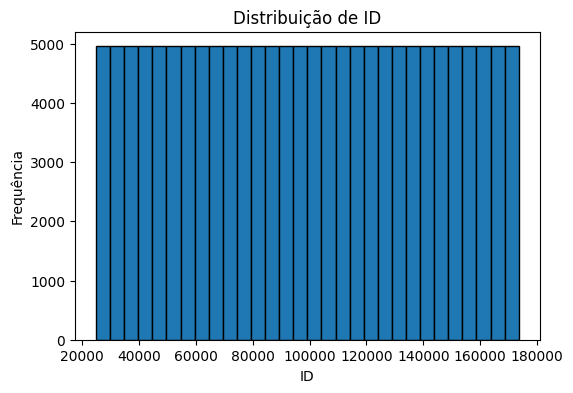

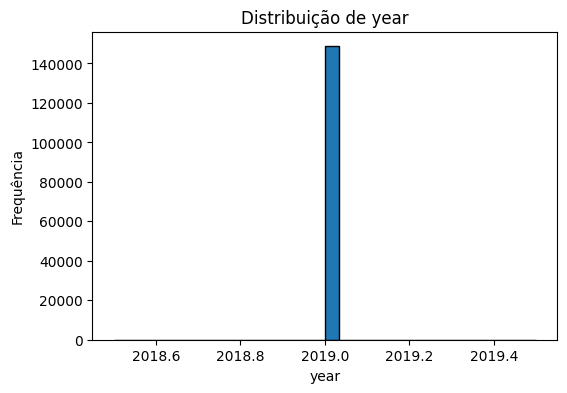

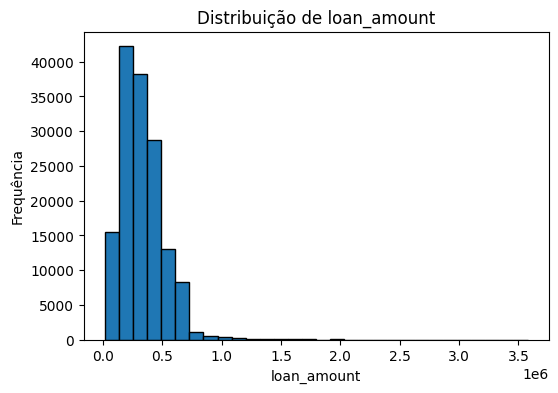

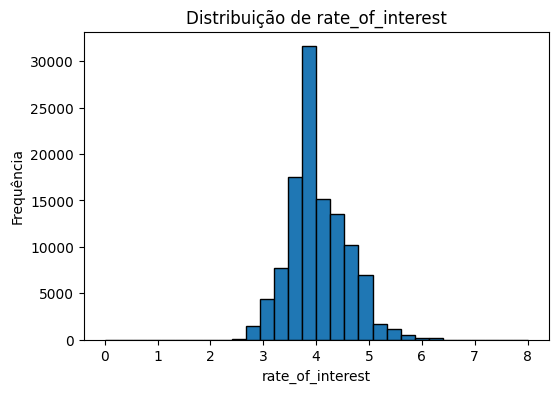

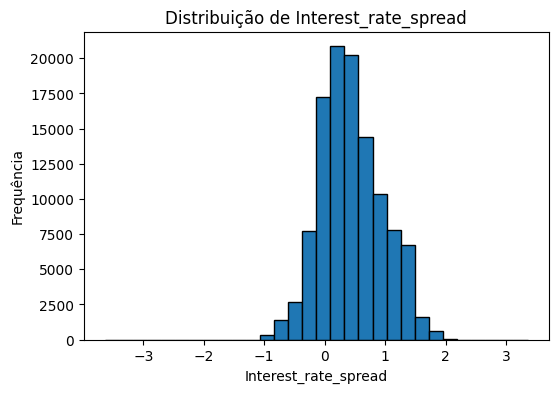

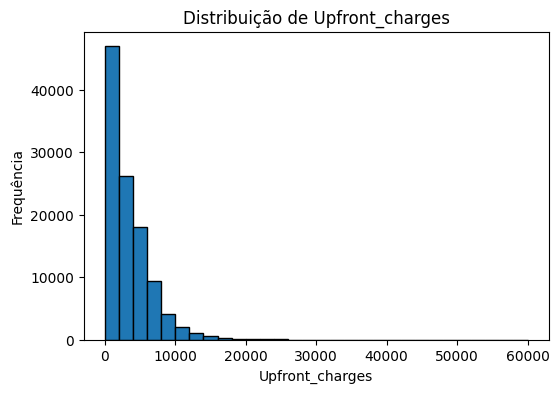

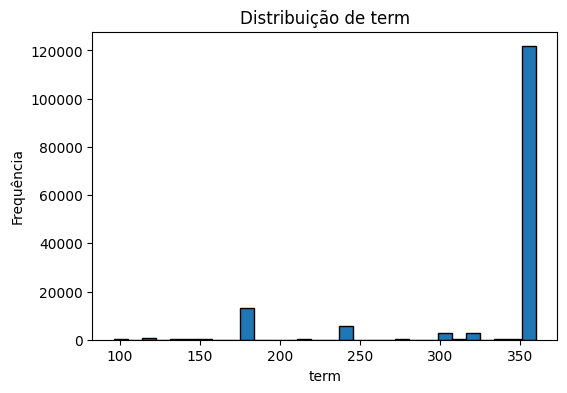

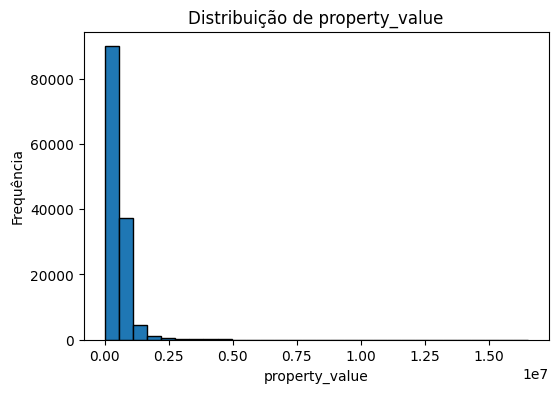

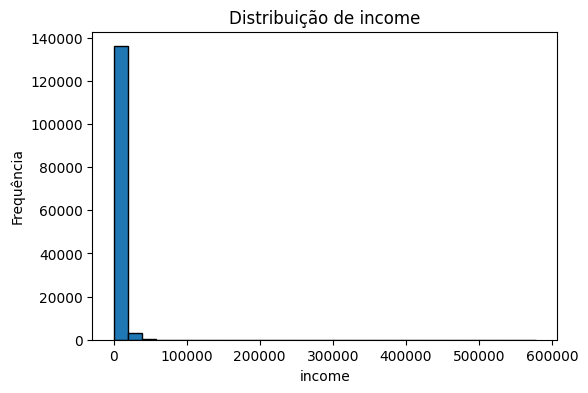

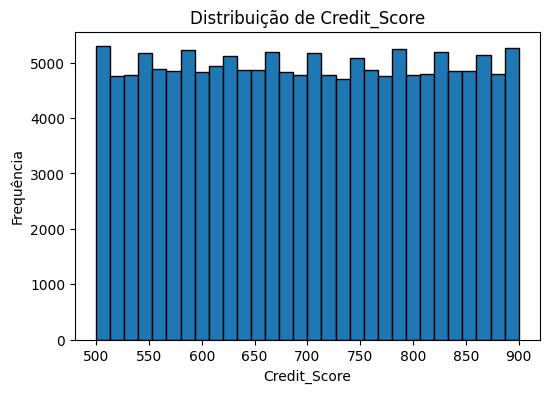

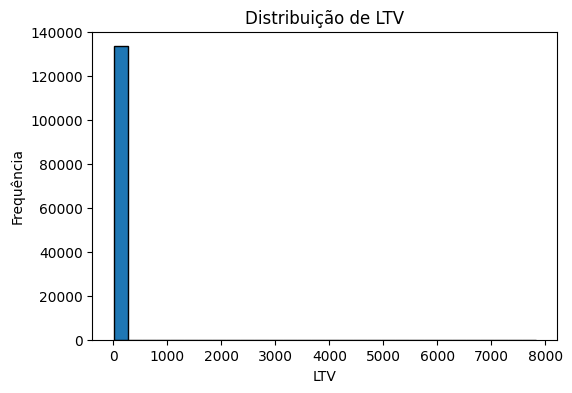

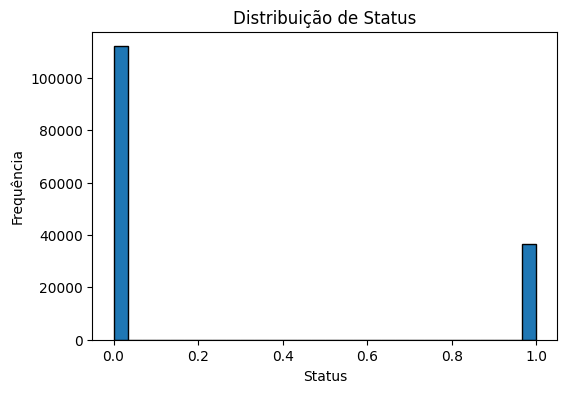

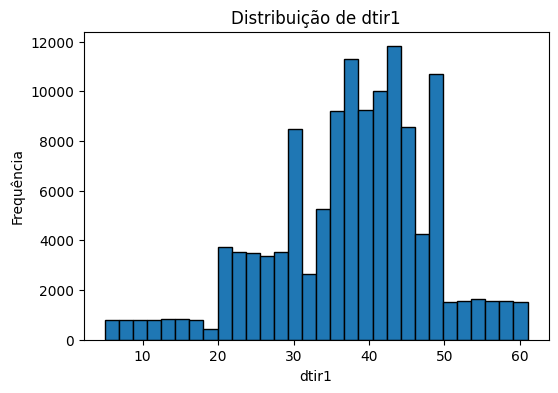

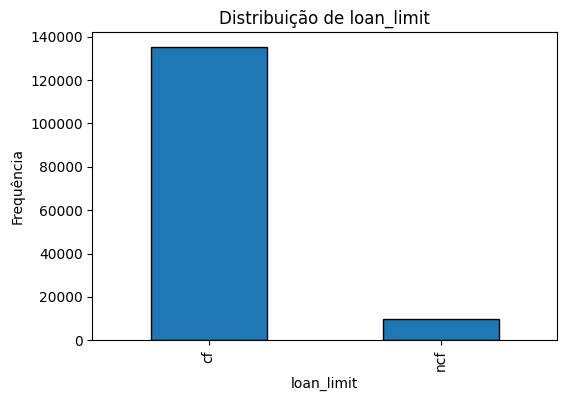

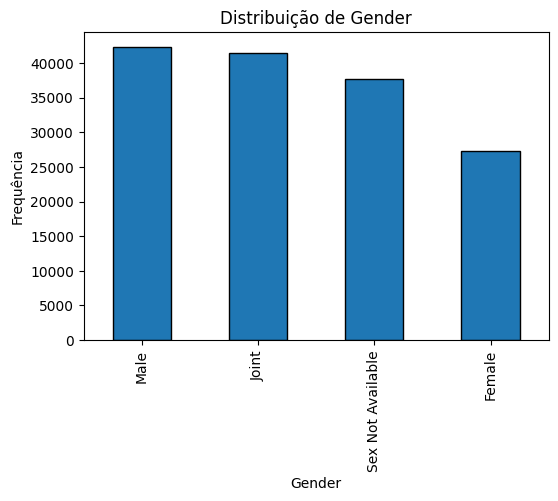

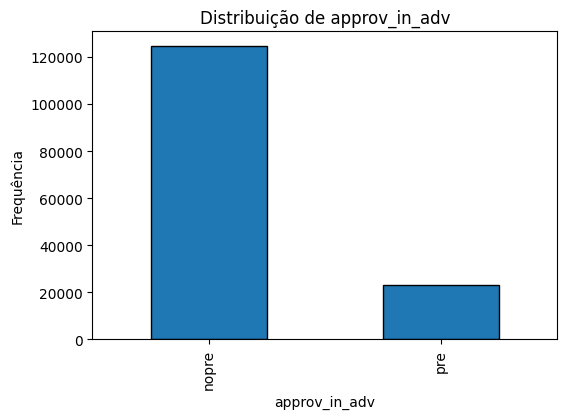

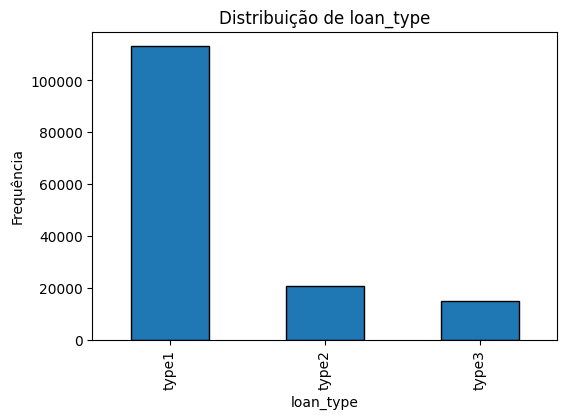

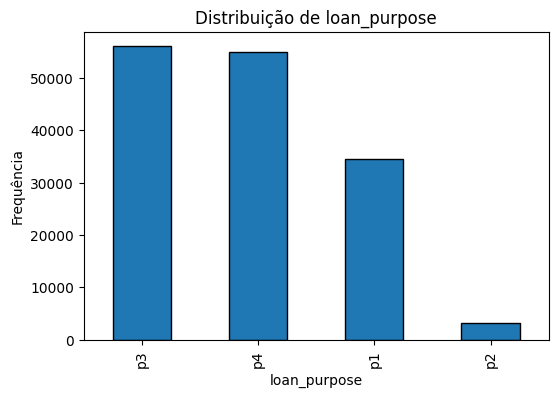

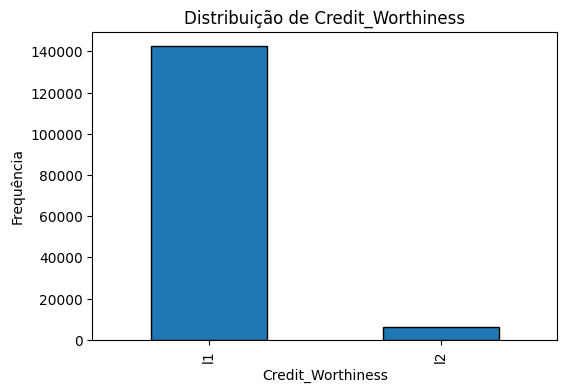

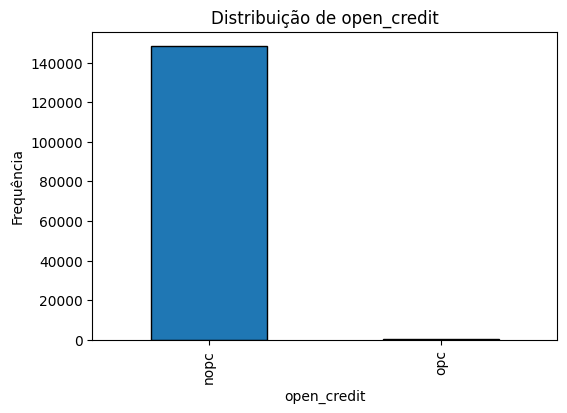

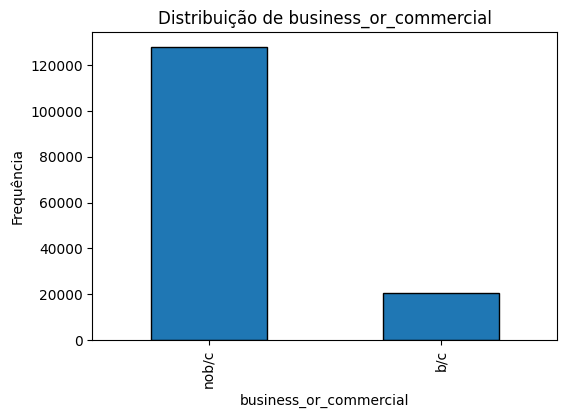

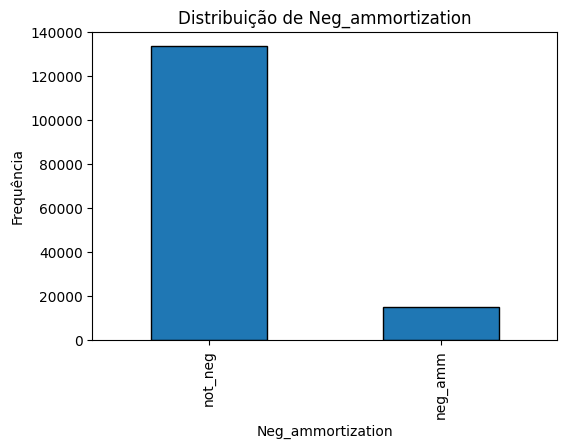

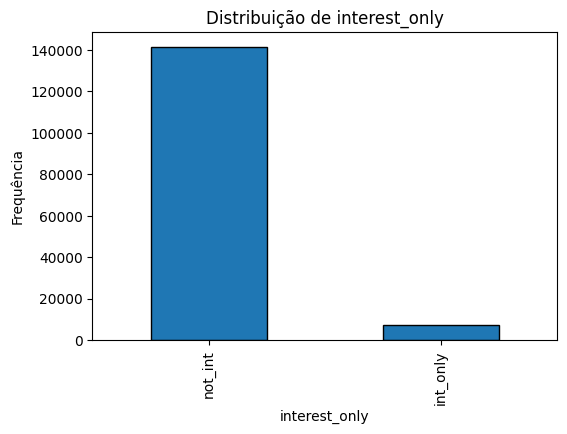

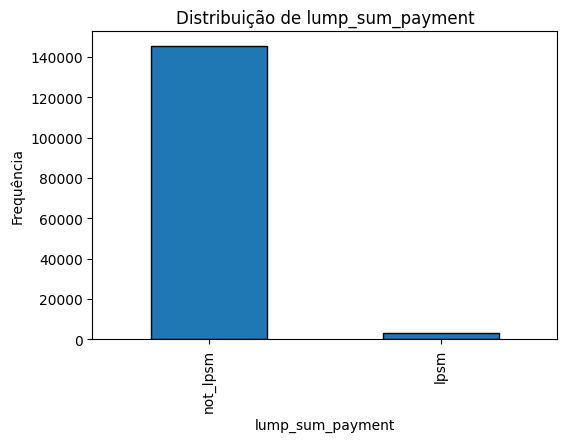

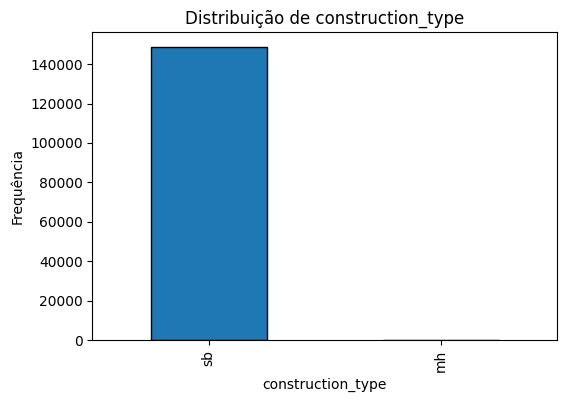

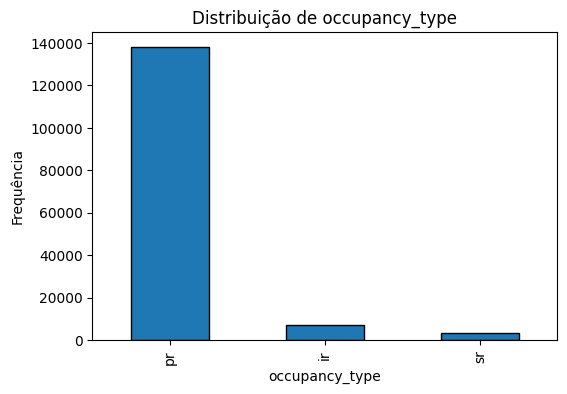

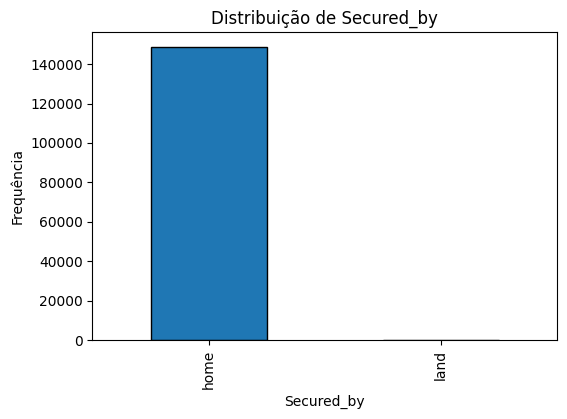

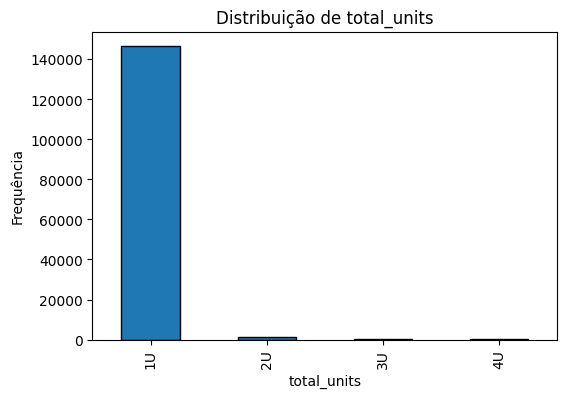

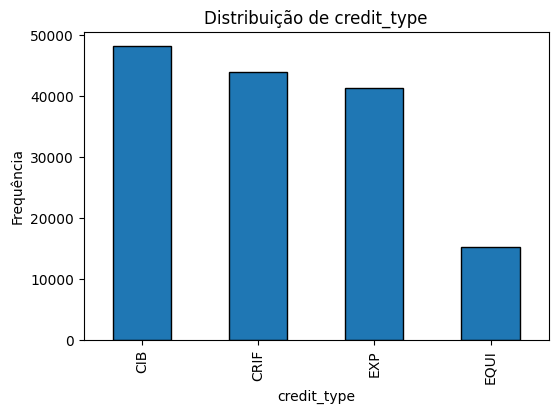

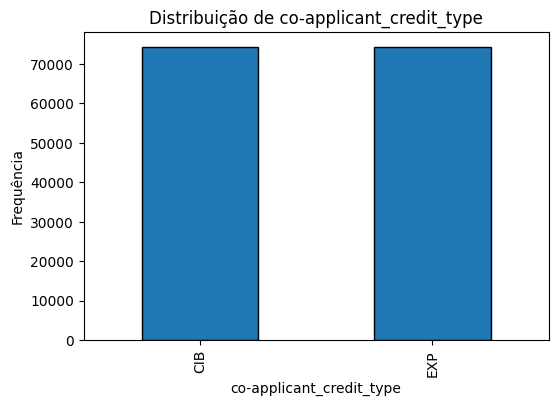

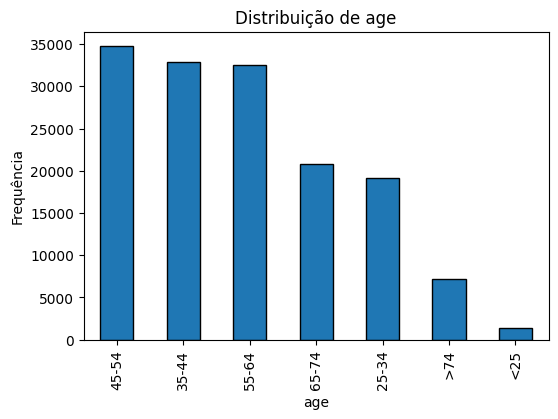

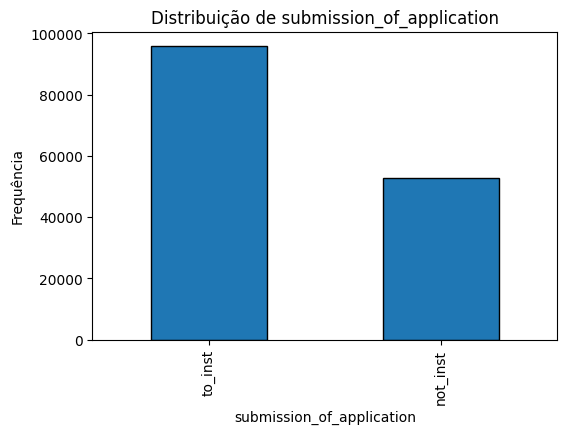

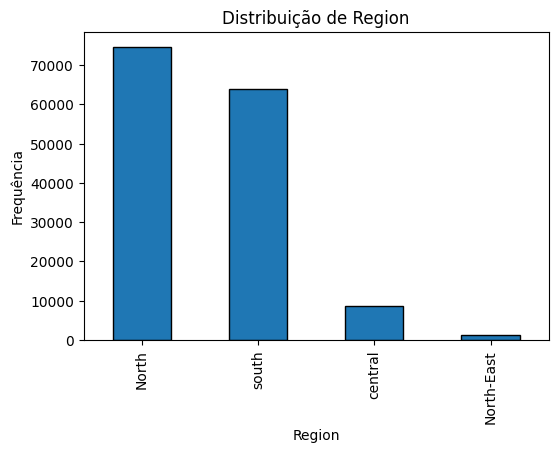

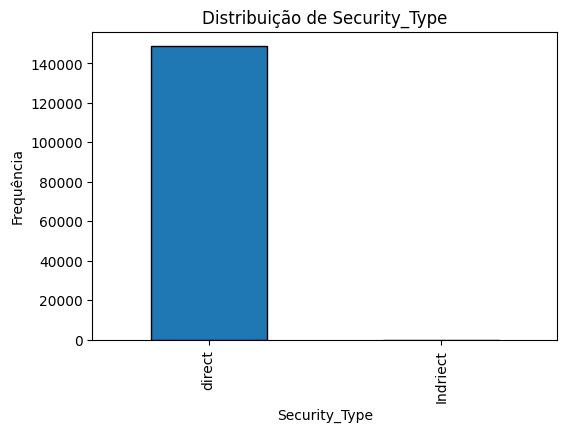

In [ ]:
import matplotlib.pyplot as plt

# Separar variáveis numéricas e categóricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Definir o tamanho padrão dos gráficos
small_figsize = (6, 4)

# Gerar histogramas para variáveis numéricas com tamanho reduzido
for col in numerical_cols:
    plt.figure(figsize=small_figsize)
    data[col].dropna().hist(bins=30, edgecolor='k')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(False)
    plt.show()

# Gerar gráficos de barras para variáveis categóricas com tamanho reduzido
for col in categorical_cols:
    plt.figure(figsize=small_figsize)
    data[col].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(False)
    plt.show()



Tabelas de métricas para variáveis numericas e categóricas

In [ ]:

# Resumo para variáveis numéricas
numeric_summary = data[numerical_cols].describe()

# Resumo para variáveis categóricas (frequência absoluta e relativa)
categorical_summary = {col: data[col].value_counts(normalize=False) for col in categorical_cols}
categorical_summary_percentage = {col: data[col].value_counts(normalize=True) * 100 for col in categorical_cols}

# Criar DataFrames organizados para variáveis categóricas
categorical_summary_dfs = {
    col: pd.DataFrame({
        "Category": categorical_summary[col].index,
        "Frequency": categorical_summary[col].values,
        "Percentage (%)": categorical_summary_percentage[col].values
    }) for col in categorical_cols
}

# Exibir as tabelas
print("### Summary of Numeric Variables ###")
print(numeric_summary)

print("\n### Summary of Categorical Variables ###")
for col, df in categorical_summary_dfs.items():
    print(f"\nVariable: {col}")
    print(df)


### Summary of Numeric Variables ###
                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96

In [ ]:
# Verificar valores únicos antes da codificação
for col in data.select_dtypes(include=['object']).columns:
    print(col + ' ' + '-'*(30-len(col)) + ' ', data[col].unique())

loan_limit --------------------  ['cf' nan 'ncf']
Gender ------------------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -----------------  ['nopre' 'pre' nan]
loan_type ---------------------  ['type1' 'type2' 'type3']
loan_purpose ------------------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness -------------  ['l1' 'l2']
open_credit -------------------  ['nopc' 'opc']
business_or_commercial --------  ['nob/c' 'b/c']
Neg_ammortization -------------  ['not_neg' 'neg_amm' nan]
interest_only -----------------  ['not_int' 'int_only']
lump_sum_payment --------------  ['not_lpsm' 'lpsm']
construction_type -------------  ['sb' 'mh']
occupancy_type ----------------  ['pr' 'sr' 'ir']
Secured_by --------------------  ['home' 'land']
total_units -------------------  ['1U' '2U' '3U' '4U']
credit_type -------------------  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ------  ['CIB' 'EXP']
age ---------------------------  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<2

### Transformando colunas categóricas em numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Dicionário para armazenar os índices dos labels e códigos
label_mappings = {}

# Aplicar Label Encoding às colunas categóricas
for col in categorical_cols:
    # Garantir que os valores sejam convertidos para strings antes de codificar
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))
    label_mappings[col] = {label: code for code, label in enumerate(label_encoders[col].classes_)}

# Exibir os índices dos labels e códigos
for col, mapping in label_mappings.items():
    print(f"### Label Encoding para a coluna '{col}' ###")
    for label, code in mapping.items():
        print(f"'{label}': {code}")
    print("\n")

# Remover as colunas 'year' e 'ID' do DataFrame, pois não fazem diferença
data = data.drop(columns=['year', 'ID'])

# Exibir um resumo dos dados após a conversão
print("### Dados após a conversão de colunas categóricas para numéricas ###")
print(data.head())


### Label Encoding para a coluna 'loan_limit' ###
'cf': 0
'nan': 1
'ncf': 2


### Label Encoding para a coluna 'Gender' ###
'Female': 0
'Joint': 1
'Male': 2
'Sex Not Available': 3


### Label Encoding para a coluna 'approv_in_adv' ###
'nan': 0
'nopre': 1
'pre': 2


### Label Encoding para a coluna 'loan_type' ###
'type1': 0
'type2': 1
'type3': 2


### Label Encoding para a coluna 'loan_purpose' ###
'nan': 0
'p1': 1
'p2': 2
'p3': 3
'p4': 4


### Label Encoding para a coluna 'Credit_Worthiness' ###
'l1': 0
'l2': 1


### Label Encoding para a coluna 'open_credit' ###
'nopc': 0
'opc': 1


### Label Encoding para a coluna 'business_or_commercial' ###
'b/c': 0
'nob/c': 1


### Label Encoding para a coluna 'Neg_ammortization' ###
'nan': 0
'neg_amm': 1
'not_neg': 2


### Label Encoding para a coluna 'interest_only' ###
'int_only': 0
'not_int': 1


### Label Encoding para a coluna 'lump_sum_payment' ###
'lpsm': 0
'not_lpsm': 1


### Label Encoding para a coluna 'construction_type' ###
'mh': 0
'

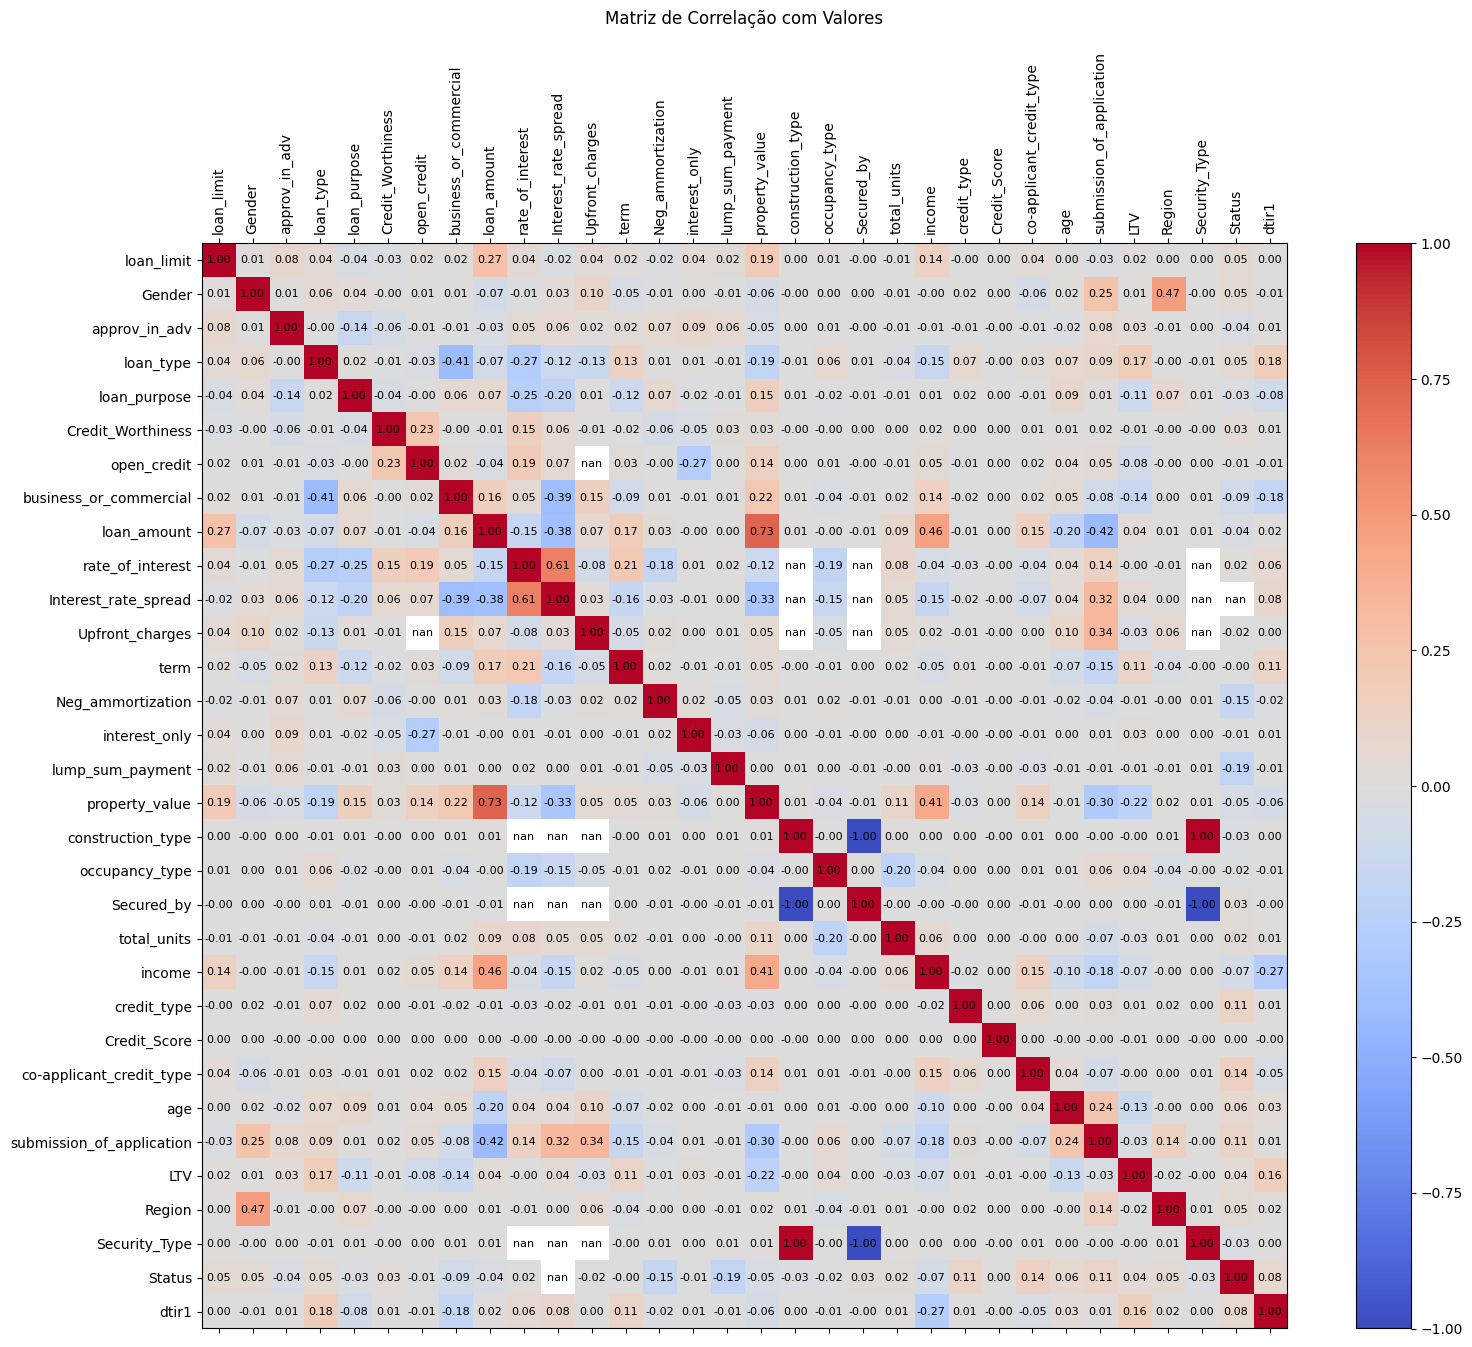

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Configurar o gráfico de correlação
plt.figure(figsize=(18, 14))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()

# Adicionar rótulos e valores de correlação
columns = data.columns
plt.xticks(range(len(columns)), columns, rotation=90)
plt.yticks(range(len(columns)), columns)

# Adicionar os valores de correlação no gráfico
for i in range(len(columns)):
    for j in range(len(columns)):
        corr_value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f'{corr_value:.2f}', ha='center', va='center', fontsize=8, color='black')

# Título do gráfico
plt.title('Matriz de Correlação com Valores', pad=20)

plt.show()


### O que é correlação?

Correlação é uma medida estatística que expressa a força e a direção de uma relação linear entre duas variáveis. Ela é representada por um coeficiente de correlação, que varia entre -1 e 1:

- **1**: Correlação positiva perfeita (à medida que uma variável aumenta, a outra também aumenta proporcionalmente).
- **-1**: Correlação negativa perfeita (à medida que uma variável aumenta, a outra diminui proporcionalmente).
- **0**: Nenhuma correlação (não há relação linear).

### Por que identificar pares com correlação maior que 0.6?

Um valor de correlação maior que 0.6 indica uma relação linear forte entre as variáveis. Quando duas variáveis estão altamente correlacionadas, elas podem carregar informações redundantes. No contexto de modelagem, isso pode causar:

1. **Multicolinearidade**: Problema em modelos estatísticos e de aprendizado de máquina, dificultando a estimativa dos efeitos individuais de cada variável.
2. **Complexidade Desnecessária**: Manter variáveis altamente correlacionadas aumenta a dimensão dos dados sem agregar informações úteis.

Por isso, identificar essas variáveis permite simplificar o conjunto de dados sem perder informações importantes.

### O que é correlação com o outcome?

O "outcome" é a variável-alvo (neste caso, provavelmente `Status`), cujo comportamento queremos prever ou analisar. A correlação com o outcome mede a relação direta entre cada variável independente e a variável-alvo. Valores mais altos de correlação com o outcome indicam que a variável tem maior impacto na previsão do resultado.

### Por que as variáveis com menor correlação com o outcome foram removidas?

Quando duas variáveis estão altamente correlacionadas (por exemplo, `X1` e `X2`) e ambas se relacionam com o outcome, mantemos apenas aquela com maior correlação com o outcome, porque:

1. **Relevância**: A variável com maior correlação com o outcome é mais útil para prever o resultado.
2. **Redundância**: A outra variável adicionaria informações duplicadas ao modelo.
3. **Eficiência**: Remover variáveis menos relevantes reduz o tamanho do conjunto de dados e melhora a eficiência computacional.

In [ ]:
from scipy.stats import pearsonr

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Identificar pares de variáveis com correlação maior que 0.6 (ignorar diagonal)
correlated_pairs = []
threshold = 0.6
columns = data.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value > threshold or corr_value < -threshold:
            var1 = columns[i]
            var2 = columns[j]
            correlated_pairs.append((var1, var2, corr_value))

# Criar um DataFrame com os pares correlacionados e suas correlações
correlated_df = pd.DataFrame(correlated_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Calcular p-valores para cada variável relacionada ao outcome (Status)
outcome = 'Status'
p_values = {}
for var in columns:
    if var != outcome:
        try:
            _, p_value = pearsonr(data[var].dropna(), data[outcome].dropna())
            p_values[var] = p_value
        except Exception:
            p_values[var] = None

# Associar os p-valores às variáveis e determinar qual manter
correlated_df['Variable 1 p-value'] = correlated_df['Variable 1'].map(p_values)
correlated_df['Variable 2 p-value'] = correlated_df['Variable 2'].map(p_values)
correlated_df['Drop Variable'] = correlated_df.apply(
    lambda row: row['Variable 1'] if row['Variable 1 p-value'] > row['Variable 2 p-value'] else row['Variable 2'],
    axis=1
)

# Exibir a tabela com pares correlacionados e decisões de exclusão
print("Pares de variáveis muito correlacionadas e suas correlações:")
print(correlated_df)

# Criar lista de variáveis a remover
variables_to_remove = correlated_df['Drop Variable'].unique()
print("\nVariáveis a sendo removidas:")
print(variables_to_remove)

# Remover variáveis do dataset
data = data.drop(columns=variables_to_remove)



Pares de variáveis muito correlacionadas e suas correlações:
          Variable 1            Variable 2  Correlation  Variable 1 p-value  \
0        loan_amount        property_value     0.734249        8.690628e-46   
1   rate_of_interest  Interest_rate_spread     0.614908                 NaN   
2  construction_type            Secured_by    -1.000000        9.390658e-24   
3  construction_type         Security_Type     1.000000        9.390658e-24   
4         Secured_by         Security_Type    -1.000000        9.390658e-24   

   Variable 2 p-value         Drop Variable  
0                 NaN        property_value  
1                 NaN  Interest_rate_spread  
2        9.390658e-24            Secured_by  
3        9.390658e-24         Security_Type  
4        9.390658e-24         Security_Type  

Variáveis a sendo removidas:
['property_value' 'Interest_rate_spread' 'Secured_by' 'Security_Type']


### O que é o p-valor?
O **p-valor** é uma medida estatística que responde à pergunta: **Qual é a probabilidade de observar uma associação tão forte (ou mais) entre essas variáveis, apenas pelo acaso?**

#### Interpretação do p-valor:
- Um **p-valor baixo** (geralmente < 0.05) sugere que há uma relação significativa entre as variáveis.
- Um **p-valor alto** (geralmente ≥ 0.05) indica que não podemos descartar a possibilidade de que a relação observada seja apenas por acaso.

No caso da análise, usamos o **p-valor para medir a relação de cada variável com o `Status` (outcome)**. Isso ajuda a identificar qual variável, dentre as correlacionadas, tem maior impacto no alvo.


### Por que remover variáveis com base no p-valor?
Quando duas variáveis são fortemente correlacionadas (por exemplo, com correlação > 0.6):
1. **Elas carregam informações redundantes**: Se ambas estão no modelo, podem "confundir" os algoritmos e dificultar a convergência, especialmente em modelos sensíveis a multicolinearidade (ex.: regressão linear).
2. **Escolha baseada no impacto no outcome**:
   - Se ambas as variáveis são correlacionadas, escolhemos manter a que é mais fortemente relacionada ao `Status`, ou seja, a que tem **p-valor menor**.
   - A variável com **p-valor maior** é menos significativa para prever o alvo e, portanto, pode ser removida.

---

### Exemplo :
Imagine duas variáveis no seu dataset:
- `income` (renda do cliente)
- `loan_amount` (valor do empréstimo)

Se `income` e `loan_amount` têm uma correlação de 0.8, significa que elas compartilham informações. Agora, digamos que:
- O p-valor de `income` com `Status` é 0.01.
- O p-valor de `loan_amount` com `Status` é 0.3.

Aqui:
- `income` tem uma relação estatisticamente mais forte com o `Status` (p-valor menor).
- `loan_amount` pode ser removido, já que ele é redundante e menos relevante para o alvo.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import warnings

# Suprimir apenas o UserWarning do Shapiro-Wilk
warnings.filterwarnings("ignore", category=UserWarning, message=".*scipy.stats.shapiro.*")

# Conta o número de missings por coluna
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Considerar apenas variáveis com missings

# Classificar variáveis (discreta, contínua)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

variable_types = []
normality_results = []

for col in missing_counts.index:
    if col in numeric_cols:
        # Verificar se é contínua ou discreta
        if data[col].nunique() < 10:  # Arbitrário: menos de 10 valores únicos é discreto
            variable_types.append('Discreta')
            normality_results.append(None)  # Discreta não avalia normalidade
        else:
            # Verificar se segue uma distribuição normal
            _, p_value = shapiro(data[col].dropna())
            if p_value > 0.05:
                variable_types.append('Contínua - Normal')
                normality_results.append('Normal')
            else:
                variable_types.append('Contínua - Não Normal')
                normality_results.append('Não Normal')
    elif col in categorical_cols:
        variable_types.append('Categórica')
        normality_results.append(None)

# Criar DataFrame com resultados
missing_summary = pd.DataFrame({
    'Variable': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Type': variable_types,
    'Normality': normality_results
})

print("Resumo das Variáveis com Valores Missing:")
print(missing_summary)

# Passo 2: Preencher os missings
for col in missing_counts.index:
    if col in numeric_cols:
        if 'Normal' in missing_summary.loc[missing_summary['Variable'] == col, 'Normality'].values:
            # Distribuição Normal -> Média
            data[col] = data[col].fillna(data[col].mean())
        else:
            # Não Normal -> Mediana
            data[col] = data[col].fillna(data[col].median())
    elif col in categorical_cols:
        # Categórica -> Moda
        data[col] = data[col].fillna(data[col].mode()[0])

print("\nValores missing tratados com sucesso!")


Resumo das Variáveis com Valores Missing:
           Variable  Missing Count                   Type   Normality
0  rate_of_interest          36439  Contínua - Não Normal  Não Normal
1   Upfront_charges          39642  Contínua - Não Normal  Não Normal
2              term             41  Contínua - Não Normal  Não Normal
3            income           9150  Contínua - Não Normal  Não Normal
4               LTV          15098  Contínua - Não Normal  Não Normal
5             dtir1          24121  Contínua - Não Normal  Não Normal

Valores missing tratados com sucesso!



### **1. Variável Discreta**
- Assume valores distintos e separados (não possui valores intermediários entre eles).

### **2. Variável Contínua**
- Pode assumir qualquer valor dentro de um intervalo (valores fracionários ou decimais incluídos).

### **3. Variável Contínua que Segue uma Distribuição Normal (ou Gaussiana)**
- Seus valores formam um padrão de "sino" quando representados em um gráfico de frequência.
- A maior parte dos valores está próxima da média, com menos valores em ambos os extremos.
- Características principais da normalidade:
  - Média, mediana e moda são aproximadamente iguais.
  - Simetria ao redor da média.
  - 68% dos valores estão a 1 desvio padrão da média.

### **4. Variável Contínua que Não Segue uma Distribuição Normal**
- A distribuição pode ser enviesada (assimétrica) ou multimodal (vários picos).
- Não segue o formato de sino.


### **Por que isso importa no tratamento de valores ausentes?**
- **Distribuições normais**:
  - Valores ausentes podem ser preenchidos pela **média**, pois esta é representativa da distribuição.

- **Distribuições não normais**:
  - A **mediana** é mais robusta contra valores extremos e assimetria, sendo mais adequada para substituir valores ausentes.

- **Variáveis discretas e categóricas**:
  - Use a **moda** (valor mais frequente), que representa melhor a tendência central.


In [ ]:
import pandas as pd

# Atualiza com a base tratada
data.to_csv('Loan_Default_tratada.csv', index=False)
# data = pd.read_csv('Loan_Default_tratada.csv')

#### RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separando as variáveis independentes e dependentes
X = data.drop(columns=['Status'])  # 'Status' parece ser o alvo
y = data['Status']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o modelo de regressão logística
log_reg = LogisticRegression(max_iter=5000, random_state=42)

# Aplicando o RFE (Recursive Feature Elimination)
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Selecionar as 10 melhores variáveis
rfe.fit(X_train_scaled, y_train)

# Seleção das melhores variáveis
selected_features = X_train.columns[rfe.support_]  # Use X_train.columns para obter os nomes das colunas originais

# Exibindo as variáveis selecionadas
print("Variáveis selecionadas: ", selected_features.tolist())


Variáveis selecionadas:  ['loan_limit', 'rate_of_interest', 'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'income', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'LTV']



### **Resumo Métricas de Avaliação**
#### **Accuracy (Acurácia)**
- **Definição:** A acurácia é a proporção de previsões corretas (positivas e negativas) em relação ao total de previsões feitas pelo modelo. É calculada como:

- **Interpretação:**
A acurácia é uma métrica geral que indica quão frequentemente o modelo faz previsões corretas. É útil quando as classes estão equilibradas, mas pode ser enganosa em conjuntos de dados desbalanceados, pois um modelo que sempre prediz a classe majoritária terá alta acurácia, mas desempenho ruim nas classes minoritárias.
#### **Precision (Precisão)**
- **Definição:** A proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.

- **Interpretação:**  
  Uma alta precision indica que o modelo faz poucas previsões positivas erradas. É útil em casos onde o custo de falsos positivos é alto, como no envio de alertas importantes.

#### **Recall (Sensibilidade ou Taxa de Verdadeiros Positivos)**
- **Definição:** A proporção de casos positivos corretamente identificados pelo modelo.

- **Interpretação:**  
  Um alto recall significa que o modelo consegue identificar a maioria dos casos positivos. É crucial em problemas onde é mais importante evitar falsos negativos, como diagnósticos de doenças graves.

#### **F1-Score**
- **Definição:** A média harmônica entre precision e recall. É uma métrica que equilibra os dois aspectos.

- **Interpretação:**  
  Um bom F1-Score indica que o modelo alcança um equilíbrio razoável entre precisão e sensibilidade, útil em cenários onde ambos são igualmente importantes.

#### **AUC (Área Sob a Curva ROC)**
- **Definição:** A área sob a curva ROC (Receiver Operating Characteristic). Mede a capacidade do modelo de separar as classes.

- **Interpretação:**  
  - **AUC = 1:** O modelo separa perfeitamente as classes.
  - **AUC = 0.5:** O modelo não tem poder discriminatório (equivalente a um palpite aleatório).
  - **AUC < 0.5:** Desempenho pior que o acaso.

---

### **2. Gráficos**

#### **Matriz de Confusão**
- **Descrição:**  
  Mostra a contagem de valores para cada combinação de previsões (positivas ou negativas) e verdadeiros rótulos (positivos ou negativos).

  **Exemplo de Matriz de Confusão:**

|                 | Predição: Negativo | Predição: Positivo |
|-----------------|--------------------|--------------------|
| Verdadeiro Negativo (VN) |       50            |         10         |
| Verdadeiro Positivo (VP) |       15            |         25         |

- **Interpretação:**
  - **Verdadeiros Negativos (VN):** Previsões corretas para a classe negativa.
  - **Falsos Positivos (FP):** Previsões incorretas para a classe negativa (erro do tipo I).
  - **Verdadeiros Positivos (VP):** Previsões corretas para a classe positiva.
  - **Falsos Negativos (FN):** Previsões incorretas para a classe positiva (erro do tipo II).

  **Uso:**  
  Identifique onde o modelo está errando (FP ou FN) e ajuste o treinamento para reduzir esses erros.

---

#### **Curva ROC (Receiver Operating Characteristic)**
- **Descrição:**  
  Plota a taxa de verdadeiros positivos (TPR ou Recall) contra a taxa de falsos positivos (FPR) para diferentes limiares de decisão.

- **Interpretação:**
  - A curva mostra como o desempenho do modelo varia ao alterar o limiar de decisão.
  - Um bom modelo terá uma curva próxima ao canto superior esquerdo.
  - A linha diagonal (45°) representa um modelo aleatório.

  **Exemplo de Análise:**
  - **Modelo A:** AUC = 0.95 (excelente separação das classes).
  - **Modelo B:** AUC = 0.75 (bom desempenho, mas com espaço para melhorias).

---

### Como Analisar os Resultados do Código

1. **Comparação entre Métodos de Balanceamento:**
   - Compare as métricas (precision, recall, F1 e AUC) para determinar qual método de balanceamento é mais adequado.
   - Use o intervalo de confiança (IC 95%) para avaliar a confiabilidade dos valores.

2. **Matriz de Confusão:**
   - Avalie os erros mais frequentes (FP ou FN) para entender os impactos do modelo em aplicações reais.

3. **Curva ROC:**
   - Observe a AUC para comparar modelos.
   - Avalie a posição e formato da curva: curvas mais próximas do canto superior esquerdo são melhores.

### Modelo 1 - Logistic Regression com Balanceamento

Resultados para Undersampling:
Precision: 0.4181 (IC 95%: 0.4102 - 0.4263)
Recall: 0.6707 (IC 95%: 0.6614 - 0.6802)
F1: 0.5151 (IC 95%: 0.5071 - 0.5230)
Auc: 0.7540 (IC 95%: 0.7484 - 0.7594)
Accuracy: 0.6889 (IC 95%: 0.6841 - 0.6934)


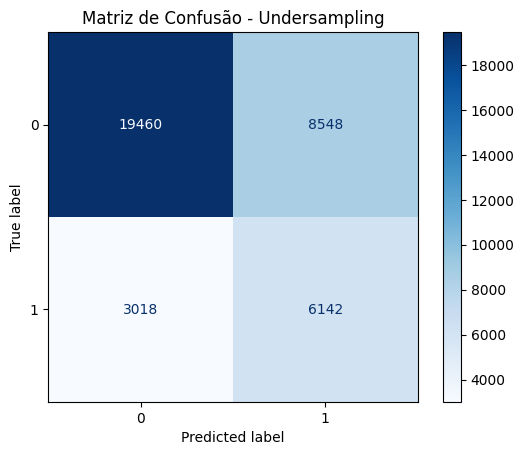

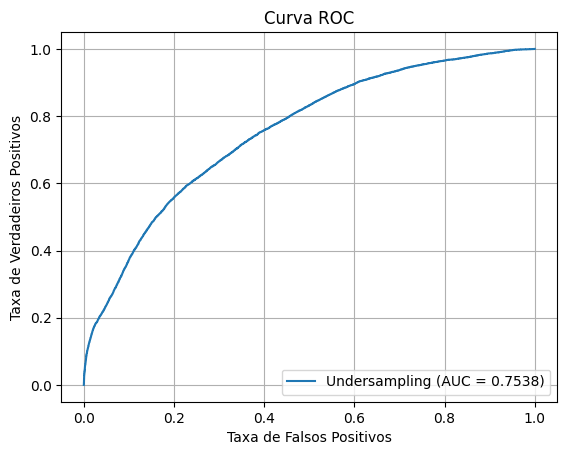

--------------------------------------------------
Resultados para Oversampling:
Precision: 0.4212 (IC 95%: 0.4130 - 0.4295)
Recall: 0.6711 (IC 95%: 0.6618 - 0.6804)
F1: 0.5175 (IC 95%: 0.5097 - 0.5253)
Auc: 0.7554 (IC 95%: 0.7496 - 0.7608)
Accuracy: 0.6917 (IC 95%: 0.6869 - 0.6964)


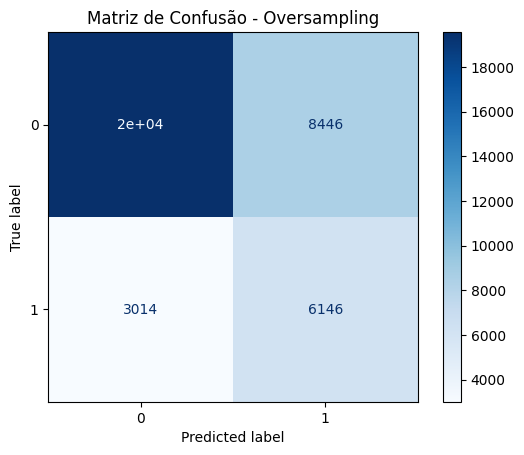

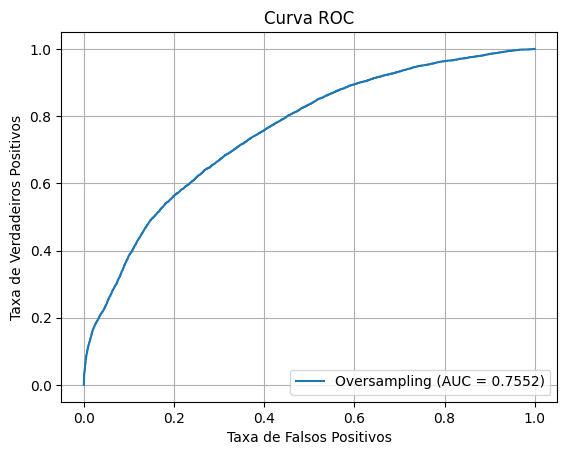

--------------------------------------------------
Resultados para Hybrid Sampling:
Precision: 0.3817 (IC 95%: 0.3747 - 0.3888)
Recall: 0.7603 (IC 95%: 0.7513 - 0.7692)
F1: 0.5083 (IC 95%: 0.5014 - 0.5157)
Auc: 0.7538 (IC 95%: 0.7481 - 0.7592)
Accuracy: 0.6375 (IC 95%: 0.6327 - 0.6424)


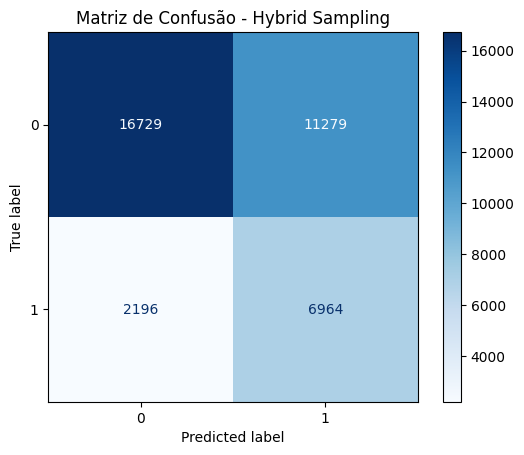

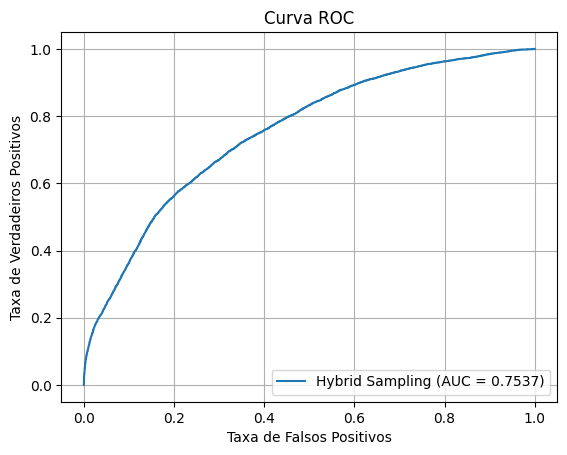

--------------------------------------------------


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separando as features e o alvo
# Supondo que 'data' seja o DataFrame de entrada
X = data.drop(columns=['Status'])
y = data['Status']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para calcular as métricas e seus intervalos de confiança
def calculate_metrics_with_ci(y_true, y_pred, y_pred_proba, n_bootstraps=1000, random_seed=42):
  np.random.seed(random_seed)
  metrics = {"precision": [], "recall": [], "f1": [], "auc": [], "accuracy": []}

  for _ in range(n_bootstraps):
    # Bootstrap amostral
    indices = np.random.choice(range(len(y_true)), size=len(y_true), replace=True)
    y_true_bs = y_true[indices]
    y_pred_bs = y_pred[indices]
    y_pred_proba_bs = y_pred_proba[indices]

    # Cálculo das métricas

    metrics["precision"].append(precision_score(y_true_bs, y_pred_bs))
    metrics["recall"].append(recall_score(y_true_bs, y_pred_bs))
    metrics["f1"].append(f1_score(y_true_bs, y_pred_bs))
    metrics["auc"].append(roc_auc_score(y_true_bs, y_pred_proba_bs))
    metrics["accuracy"].append(accuracy_score(y_true_bs, y_pred_bs))

  # Cálculo das médias e intervalos de confiança
  results = {
    "precision": (np.mean(metrics["precision"]), np.percentile(metrics["precision"], [2.5, 97.5])),
    "recall": (np.mean(metrics["recall"]), np.percentile(metrics["recall"], [2.5, 97.5])),
    "f1": (np.mean(metrics["f1"]), np.percentile(metrics["f1"], [2.5, 97.5])),
    "auc": (np.mean(metrics["auc"]), np.percentile(metrics["auc"], [2.5, 97.5])),
    "accuracy": (np.mean(metrics["accuracy"]), np.percentile(metrics["accuracy"], [2.5, 97.5]))
  }
  return results

# Função para treinar, avaliar e exibir resultados
def train_and_evaluate_with_ci(X_train_balanced, y_train_balanced, X_test, y_test, method_name):
  # Treinando o modelo de Regressão Logística
  model = LogisticRegression(max_iter=1000, random_state=42)
  model.fit(X_train_balanced, y_train_balanced)

  # Fazendo previsões
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Calculando métricas com intervalos de confiança
  results = calculate_metrics_with_ci(y_test.values, y_pred, y_pred_proba)

  # Exibindo os resultados
  print(f"Resultados para {method_name}:")
  for metric, (mean, ci) in results.items():
    print(f"{metric.capitalize()}: {mean:.4f} (IC 95%: {ci[0]:.4f} - {ci[1]:.4f})")

  # Matriz de confusão
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(cmap="Blues")
  plt.title(f"Matriz de Confusão - {method_name}")
  plt.show()

  # Curva ROC
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, label=f'{method_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
  plt.xlabel("Taxa de Falsos Positivos")
  plt.ylabel("Taxa de Verdadeiros Positivos")
  plt.title("Curva ROC")
  plt.legend(loc="lower right")
  plt.grid()
  plt.show()

  print("-" * 50)

# 1. Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci(X_train_under, y_train_under, X_test, y_test, "Undersampling")

# 2. Oversampling
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci(X_train_over, y_train_over, X_test, y_test, "Oversampling")

# 3. Hybrid Sampling
hybrid_sampler = SMOTEENN(random_state=42)
X_train_hybrid, y_train_hybrid = hybrid_sampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci(X_train_hybrid, y_train_hybrid, X_test, y_test, "Hybrid Sampling")


### **Análise dos Resultados**

#### **Resumo das Métricas**
| Método               | Accuracy (IC 95%)        | Precision (IC 95%)        | Recall (IC 95%)           | F1-Score (IC 95%)          | AUC (IC 95%)             |
|----------------------|----------------------|--------------------------|--------------------------|---------------------------|--------------------------|
| **Undersampling**    | 0.6889 (0.6841 - 0.6934) | 0.4181 (0.4102 - 0.4263) | 0.6707 (0.6614 - 0.6802) | 0.5151 (I0.5071 - 0.5230)  | 0.7540 (0.7484 - 0.7594) |
| **Oversampling**     | 0.6917 (0.6869 - 0.6964) | 0.4212 (0.4130 - 0.4295) | 0.6711 (0.6618 - 0.6804) | 0.5175 (0.5097 - 0.5253)  | 0.7554 (0.7496 - 0.7608) |
| **Hybrid Sampling**  | 0.6375 (0.6327 - 0.6424) | 0.3817 (0.3747 - 0.3888) | 0.7603 (0.7513 - 0.7692) | 0.5083 (0.5014 - 0.5157)  | 0.7538 (0.7481 - 0.7592) |


#### **Análise das Métricas:**

1. **Undersampling:**
   - **Precision (0.4181)**: É relativamente baixa, indicando que muitos positivos preditos foram falsos positivos.
   - **Recall (0.6707)**: Moderado, o modelo conseguiu recuperar uma boa parte dos positivos verdadeiros.
   - **F1 Score (0.5151)**: Um equilíbrio razoável entre precisão e recall.
   - **AUC (0.7540)**: Mostra uma boa separação entre classes.
   - **Accuracy (0.6889)**: A acurácia é moderada, mas reflete o impacto do undersampling, que reduz os dados para balancear as classes.

2. **Oversampling (SMOTE):**
   - **Precision (0.4212)**: Ligeiramente maior que no undersampling.
   - **Recall (0.6711)**: Similar ao undersampling, sugerindo uma boa recuperação de positivos verdadeiros.
   - **F1 Score (0.5175)**: Um pouco melhor, mostrando o equilíbrio entre precisão e recall.
   - **AUC (0.7554)**: Um pequeno aumento em relação ao undersampling.
   - **Accuracy (0.6917)**: A maior entre os métodos testados, refletindo um impacto positivo do oversampling.

3. **Hybrid Sampling (SMOTEENN):**
   - **Precision (0.3817)**: A precisão mais baixa, indicando muitos falsos positivos.
   - **Recall (0.7603)**: O maior valor, mostrando que o modelo é muito bom em recuperar positivos verdadeiros.
   - **F1 Score (0.5083)**: Apesar do alto recall, o equilíbrio com a baixa precisão faz o F1 ser similar aos outros métodos.
   - **AUC (0.7538)**: Similar aos demais métodos.
   - **Accuracy (0.6375)**: A mais baixa entre os métodos, devido ao alto número de falsos positivos.

### **Conclusões**:
- O **Oversampling (SMOTE)** mostrou-se o método mais equilibrado, com a maior acurácia (69.17%), uma boa AUC (75.54%) e um F1 Score ligeiramente melhor.
- O **Hybrid Sampling (SMOTEENN)** é útil para priorizar recall, mas sacrificou precisão e acurácia.
- O **Undersampling** teve desempenho competitivo, mas foi limitado pela redução do tamanho do conjunto de dados, que diminuiu a acurácia geral.

### **Como aplicar**
Se for crítico minimizar falsos negativos (priorizar recall), o **Hybrid Sampling** pode ser uma boa escolha. Porém, se for necessário um equilíbrio geral, o **Oversampling** parece mais indicado.


### Modelo 2 - Naive-Bayes

Resultados para Undersampling:
Precision: 0.9808 (IC 95%: 0.9731 - 0.9873)
Recall: 0.1562 (IC 95%: 0.1493 - 0.1637)
F1: 0.2694 (IC 95%: 0.2591 - 0.2805)
Auc: 0.9919 (IC 95%: 0.9909 - 0.9931)
Accuracy: 0.7913 (IC 95%: 0.7871 - 0.7958)


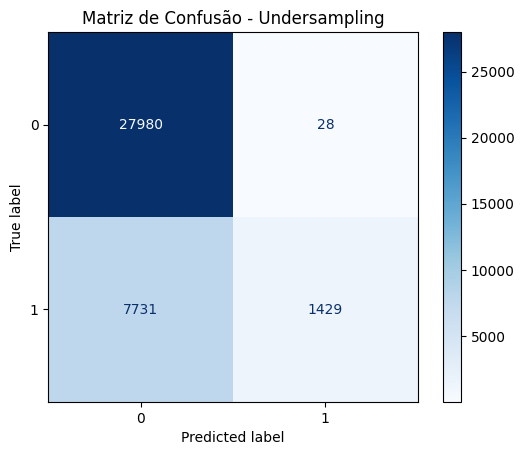

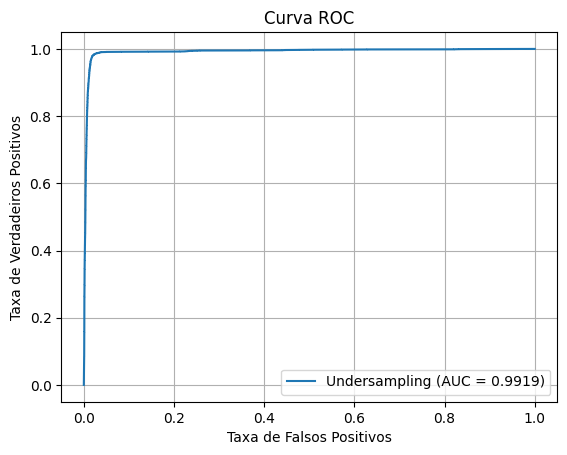

--------------------------------------------------
Resultados para Oversampling:
Precision: 0.9809 (IC 95%: 0.9733 - 0.9875)
Recall: 0.1517 (IC 95%: 0.1447 - 0.1590)
F1: 0.2627 (IC 95%: 0.2521 - 0.2737)
Auc: 0.9926 (IC 95%: 0.9915 - 0.9937)
Accuracy: 0.7902 (IC 95%: 0.7861 - 0.7946)


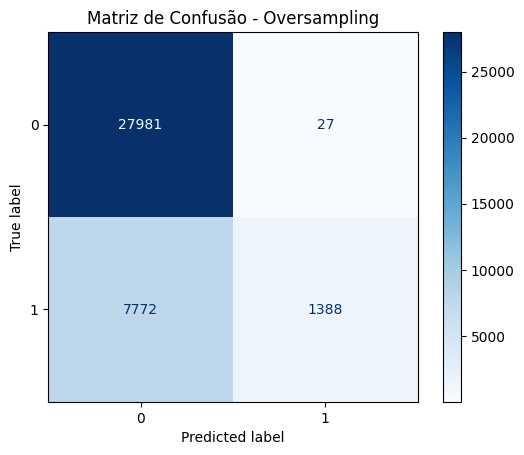

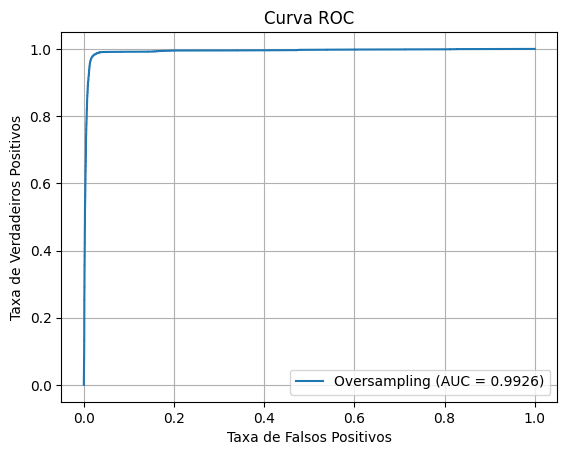

--------------------------------------------------
Resultados para Hybrid Sampling:
Precision: 0.9365 (IC 95%: 0.9257 - 0.9466)
Recall: 0.2127 (IC 95%: 0.2049 - 0.2212)
F1: 0.3466 (IC 95%: 0.3360 - 0.3583)
Auc: 0.9881 (IC 95%: 0.9867 - 0.9894)
Accuracy: 0.8025 (IC 95%: 0.7984 - 0.8066)


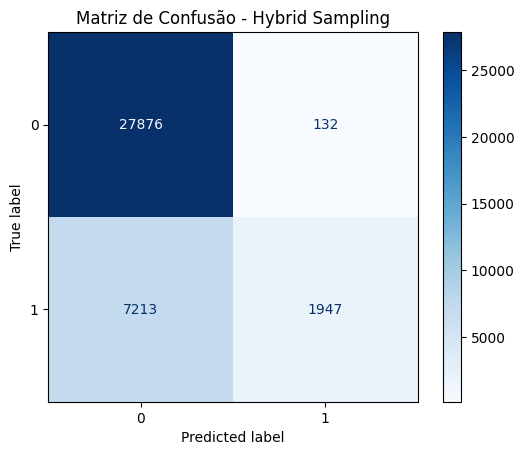

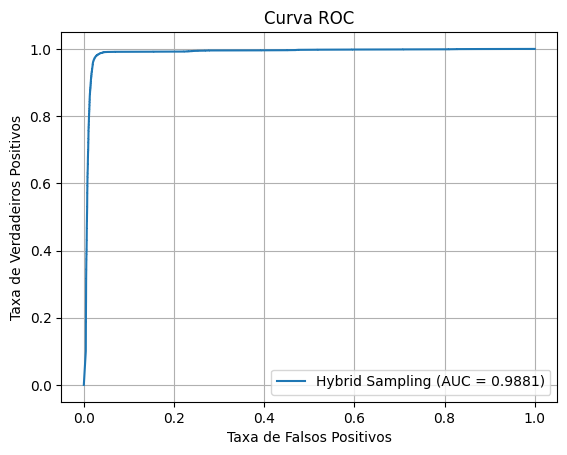

--------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separando as features e o alvo
X = data.drop(columns=['Status'])
y = data['Status']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para calcular as métricas com intervalos de confiança
def calculate_metrics_with_ci(y_true, y_pred, y_pred_proba, n_bootstraps=1000, random_seed=42):
  np.random.seed(random_seed)
  metrics = {"precision": [], "recall": [], "f1": [], "auc": [], "accuracy": []}

  for _ in range(n_bootstraps):
    indices = np.random.choice(range(len(y_true)), size=len(y_true), replace=True)
    y_true_bs = y_true[indices]
    y_pred_bs = y_pred[indices]
    y_pred_proba_bs = y_pred_proba[indices]

    metrics["precision"].append(precision_score(y_true_bs, y_pred_bs))
    metrics["recall"].append(recall_score(y_true_bs, y_pred_bs))
    metrics["f1"].append(f1_score(y_true_bs, y_pred_bs))
    metrics["auc"].append(roc_auc_score(y_true_bs, y_pred_proba_bs))
    metrics["accuracy"].append(accuracy_score(y_true_bs, y_pred_bs))

  results = {
    "precision": (np.mean(metrics["precision"]), np.percentile(metrics["precision"], [2.5, 97.5])),
    "recall": (np.mean(metrics["recall"]), np.percentile(metrics["recall"], [2.5, 97.5])),
    "f1": (np.mean(metrics["f1"]), np.percentile(metrics["f1"], [2.5, 97.5])),
    "auc": (np.mean(metrics["auc"]), np.percentile(metrics["auc"], [2.5, 97.5])),
    "accuracy": (np.mean(metrics["accuracy"]), np.percentile(metrics["accuracy"], [2.5, 97.5]))
  }
  return results

# Função para treinar, avaliar e exibir resultados
def train_and_evaluate_with_ci_naive_bayes(X_train_balanced, y_train_balanced, X_test, y_test, method_name):
    # Treinando o modelo Naive Bayes
    model = GaussianNB()
    model.fit(X_train_balanced, y_train_balanced)

    # Fazendo previsões
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculando métricas com intervalos de confiança
    results = calculate_metrics_with_ci(y_test.values, y_pred, y_pred_proba)

    # Exibindo os resultados
    print(f"Resultados para {method_name}:")
    for metric, (mean, ci) in results.items():
      print(f"{metric.capitalize()}: {mean:.4f} (IC 95%: {ci[0]:.4f} - {ci[1]:.4f})")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - {method_name}")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{method_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title("Curva ROC")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print("-" * 50)

# 1. Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci_naive_bayes(X_train_under, y_train_under, X_test, y_test, "Undersampling")

# 2. Oversampling
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci_naive_bayes(X_train_over, y_train_over, X_test, y_test, "Oversampling")

# 3. Hybrid Sampling
hybrid_sampler = SMOTEENN(random_state=42)
X_train_hybrid, y_train_hybrid = hybrid_sampler.fit_resample(X_train, y_train)
train_and_evaluate_with_ci_naive_bayes(X_train_hybrid, y_train_hybrid, X_test, y_test, "Hybrid Sampling")


### **Análise dos Resultados - Naive Bayes**

#### **Resumo das Métricas**
| Método               | Accuracy (IC 95%)       | Precision (IC 95%)         | Recall (IC 95%)           | F1-Score (IC 95%)         | AUC (IC 95%)            |
|----------------------|-------------------------|----------------------------|---------------------------|---------------------------|-------------------------|
| **Undersampling**    | 0.7913 (0.7871 - 0.7958) | 0.9808 (0.9731 - 0.9873)   | 0.1562 (0.1493 - 0.1637)  | 0.2694 (0.2591 - 0.2805) | 0.9919 (0.9909 - 0.9931) |
| **Oversampling**     | 0.7902 (0.7861 - 0.7946) | 0.9809 (0.9733 - 0.9875)   | 0.1517 (0.1447 - 0.1590)  | 0.2627 (0.2521 - 0.2737) | 0.9926 (0.9915 - 0.9937) |
| **Hybrid Sampling**  | 0.8025 (0.7984 - 0.8066) | 0.9365 (0.9257 - 0.9466)   | 0.2127 (0.2049 - 0.2212)  | 0.3466 (0.3360 - 0.3583) | 0.9881 (0.9867 - 0.9894) |

### **Análise das Métricas**

1. **Undersampling**:
   - **Precision (0.9808)**: Extremamente alta, indicando que os positivos preditos têm grande probabilidade de serem verdadeiros positivos.
   - **Recall (0.1562)**: Muito baixo, significando que o modelo não conseguiu recuperar uma proporção significativa de verdadeiros positivos.
   - **F1 Score (0.2694)**: Reflete o equilíbrio insatisfatório entre precisão e recall.
   - **AUC (0.9919)**: Excelente, demonstrando uma alta capacidade de separação entre classes.
   - **Accuracy (0.7913)**: Moderada, mostrando que a redução dos dados pela técnica de undersampling impacta a acurácia geral.

2. **Oversampling (SMOTE)**:
   - **Precision (0.9809)**: Praticamente idêntica ao undersampling, muito alta.
   - **Recall (0.1517)**: Levemente inferior ao undersampling, sugerindo uma leve piora na recuperação de positivos verdadeiros.
   - **F1 Score (0.2627)**: Muito próximo ao resultado do undersampling.
   - **AUC (0.9926)**: Melhor entre os métodos, destacando-se na separação entre classes.
   - **Accuracy (0.7902)**: Similar ao undersampling, refletindo o impacto do oversampling no modelo.

3. **Hybrid Sampling (SMOTEENN)**:
   - **Precision (0.9365)**: Embora ligeiramente inferior aos outros métodos, ainda alta.
   - **Recall (0.2127)**: Significativamente melhor do que as outras abordagens, indicando uma recuperação superior de verdadeiros positivos.
   - **F1 Score (0.3466)**: O melhor resultado, devido ao maior equilíbrio entre precisão e recall.
   - **AUC (0.9881)**: Levemente inferior aos demais métodos, mas ainda excelente.
   - **Accuracy (0.8025)**: A maior entre os métodos, destacando-se como a técnica mais equilibrada.

### **Conclusões**
- **Oversampling (SMOTE)** alcançou a maior AUC (0.9926), refletindo uma excelente capacidade discriminativa, mas seu recall baixo limita a recuperação de positivos verdadeiros.
- **Hybrid Sampling (SMOTEENN)** demonstrou o melhor equilíbrio entre as métricas, com o maior F1 Score (0.3466) e uma acurácia levemente superior aos demais métodos.
- **Undersampling** teve desempenho competitivo, mas apresentou o menor recall (0.1562), impactando negativamente o F1 Score.

### **Como aplicar**
- Se o objetivo for maximizar a separação entre classes (alta AUC), o **Oversampling** é a melhor escolha.
- Se for essencial priorizar um maior equilíbrio geral entre precisão e recall, o **Hybrid Sampling** é mais indicado.
- Caso o foco esteja em reduzir o custo computacional e o volume de dados, o **Undersampling** pode ser suficiente.

### **Comparação das Métricas - Logistic Regression vs. Naive Bayes**

#### **Resumo Comparativo**
| Modelo               | Método               | Accuracy (IC 95%)        | Precision (IC 95%)       | Recall (IC 95%)          | F1-Score (IC 95%)        | AUC (IC 95%)            |
|----------------------|----------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| **Logistic Regression** | **Undersampling**    | 0.6889 (0.6841 - 0.6934) | 0.4181 (0.4102 - 0.4263) | 0.6707 (0.6614 - 0.6802) | 0.5151 (0.5071 - 0.5230) | 0.7540 (0.7484 - 0.7594) |
| **Logistic Regression** | **Oversampling**     | 0.6917 (0.6869 - 0.6964) | 0.4212 (0.4130 - 0.4295) | 0.6711 (0.6618 - 0.6804) | 0.5175 (0.5097 - 0.5253) | 0.7554 (0.7496 - 0.7608) |
| **Logistic Regression** | **Hybrid Sampling**  | 0.6375 (0.6327 - 0.6424) | 0.3817 (0.3747 - 0.3888) | 0.7603 (0.7513 - 0.7692) | 0.5083 (0.5014 - 0.5157) | 0.7538 (0.7481 - 0.7592) |
| **Naive Bayes**        | **Undersampling**    | 0.7913 (0.7871 - 0.7958) | 0.9808 (0.9731 - 0.9873) | 0.1562 (0.1493 - 0.1637) | 0.2694 (0.2591 - 0.2805) | 0.9919 (0.9909 - 0.9931) |
| **Naive Bayes**        | **Oversampling**     | 0.7902 (0.7861 - 0.7946) | 0.9809 (0.9733 - 0.9875) | 0.1517 (0.1447 - 0.1590) | 0.2627 (0.2521 - 0.2737) | 0.9926 (0.9915 - 0.9937) |
| **Naive Bayes**        | **Hybrid Sampling**  | 0.8025 (0.7984 - 0.8066) | 0.9365 (0.9257 - 0.9466) | 0.2127 (0.2049 - 0.2212) | 0.3466 (0.3360 - 0.3583) | 0.9881 (0.9867 - 0.9894) |


### **Análise Comparativa**

1. **Undersampling**:
   - **Logistic Regression** apresentou melhor equilíbrio geral entre **Precision (0.4181)** e **Recall (0.6707)**, resultando em um **F1-Score (0.5151)** mais elevado.
   - **Naive Bayes** teve **Precision (0.9808)** significativamente maior, mas seu **Recall (0.1562)** foi muito baixo, comprometendo o **F1-Score (0.2694)**.
   - **Naive Bayes** destaca-se com uma **AUC (0.9919)** muito superior, mostrando uma capacidade elevada de separação de classes.

2. **Oversampling (SMOTE)**:
   - **Logistic Regression** manteve o equilíbrio entre **Precision (0.4212)** e **Recall (0.6711)**, com o maior **F1-Score (0.5175)** entre os dois modelos.
   - **Naive Bayes** novamente apresentou uma **Precision (0.9809)** muito alta, mas um **Recall (0.1517)** limitado, resultando em **F1-Score (0.2627)** inferior.
   - **Naive Bayes** liderou em **AUC (0.9926)**, indicando uma maior separação entre classes.

3. **Hybrid Sampling (SMOTEENN)**:
   - **Logistic Regression** priorizou o **Recall (0.7603)** mais elevado, resultando em um desempenho melhor para recuperação de positivos verdadeiros. Contudo, a **Precision (0.3817)** e **F1-Score (0.5083)** foram limitados.
   - **Naive Bayes** teve desempenho mais equilibrado, com **Precision (0.9365)** elevada e **Recall (0.2127)** superior às outras abordagens, levando ao maior **F1-Score (0.3466)** para este modelo.
   - **Naive Bayes** novamente apresentou uma **AUC (0.9881)** superior à de **Logistic Regression**.


### **Conclusões Gerais**
- **Logistic Regression**:
  - Melhor desempenho no equilíbrio entre precisão e recall, refletido por **F1-Scores** consistentemente superiores.
  - É mais robusto para cenários em que o equilíbrio geral das métricas é prioritário.
  - Recomenda-se para tarefas onde o foco está em identificar tanto positivos verdadeiros quanto negativos verdadeiros com eficiência.

- **Naive Bayes**:
  - Destacou-se com a maior **Precision** e **AUC** em todas as abordagens, mostrando uma capacidade superior de separação entre classes e confiabilidade nos positivos preditos.
  - Contudo, apresentou **Recall** muito baixo, limitando sua capacidade de identificar positivos verdadeiros.
  - Recomenda-se para cenários onde falsos positivos têm alto custo e o foco está na confiança das predições positivas.

### **Aplicação Final**
- Se o objetivo é maximizar o equilíbrio entre precisão e recall, optar por **Logistic Regression**.
- Se o objetivo é maximizar a precisão e a capacidade de separação entre classes (AUC), escolher **Naive Bayes**.
